In [1]:
# Import the necessary libraries

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
#import keras

# Helper libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import random
import datetime

Using TensorFlow backend.


In [8]:
#Besoin de mettre le path absolu vers le dataset (normalement présent dans le projet)
data = "C:\\Users\\alexa\\.keras\\datasets\\flower_photos"
#fichier_modele="model.h5"
# List out the directories inside the main input folder

folders = os.listdir(data)
folders.remove("LICENSE.txt")
print(folders)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
# Import the images and resize them to a 128*128 size
# Also generate the corresponding labels

image_names = []
train_labels = []
train_images = []

size = 64,64

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue

In [10]:
print(len(train_images))
# Transform the image array to a numpy type

train = np.array(train_images)

print(train.shape)

3670
(3670, 64, 64, 3)


In [11]:
# Reduce the RGB values between 0 and 1
train = train.astype('float32') / 255.0

In [12]:
# Extract the labels
label_dummies = pandas.get_dummies(train_labels)

labels =  label_dummies.values.argmax(1)

In [13]:
print(labels)

[0 0 0 ... 4 4 4]


In [14]:
print(pandas.unique(train_labels), "\n", pandas.unique(labels))

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips'] 
 [0 1 2 3 4]


In [15]:
# Shuffle the labels and images randomly for better results
union_list = list(zip(train, labels))
random.shuffle(union_list)
train,labels = zip(*union_list)

# Convert the shuffled list to numpy array type
train = np.array(train)
labels = np.array(labels)

In [14]:
# Develop a sequential model using tensorflow keras

model = keras.Sequential([
    keras.layers.Conv2D(8,kernel_size=3,strides=2,activation='relu',padding='valid',input_shape=(64,64,3) ),
    keras.layers.Conv2D(16,kernel_size=3,strides=2,activation='relu',padding='valid' ),          
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(5, activation='softmax')
])

In [14]:
# Compute the model parameters
model.compile(optimizer='adadelta', #tf.train.AdamOptimizer()', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               460928    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 462,965
Trainable params: 462,965
Non-trainable params: 0
_________________________________________________________________


In [16]:
model = keras.models.load_model("model.h5")

In [204]:
# Train the model  with 5 epochs 
model.fit(train,labels, epochs=1500)

Train on 3670 samples
Epoch 1/1500
3670/3670 [==============================] - 2s 480us/sample - loss: 0.4930 - accuracy: 0.8594
Epoch 2/1500
3670/3670 [==============================] - 2s 415us/sample - loss: 0.4929 - accuracy: 0.8594
Epoch 3/1500
3670/3670 [==============================] - 2s 415us/sample - loss: 0.4926 - accuracy: 0.8578
Epoch 4/1500
3670/3670 [==============================] - 2s 416us/sample - loss: 0.4927 - accuracy: 0.8597
Epoch 5/1500
3670/3670 [==============================] - 2s 424us/sample - loss: 0.4925 - accuracy: 0.8591
Epoch 6/1500
3670/3670 [==============================] - 2s 419us/sample - loss: 0.4922 - accuracy: 0.8578
Epoch 7/1500
3670/3670 [==============================] - 2s 420us/sample - loss: 0.4920 - accuracy: 0.8591
Epoch 8/1500
3670/3670 [==============================] - 2s 422us/sample - loss: 0.4920 - accuracy: 0.8575
Epoch 9/1500
3670/3670 [==============================] - 2s 428us/sample - loss: 0.4917 - accuracy: 0.8589
Epoch 

3670/3670 [==============================] - 2s 454us/sample - loss: 0.4694 - accuracy: 0.8706
Epoch 150/1500
3670/3670 [==============================] - 2s 433us/sample - loss: 0.4692 - accuracy: 0.8684
Epoch 151/1500
3670/3670 [==============================] - 2s 427us/sample - loss: 0.4692 - accuracy: 0.8692
Epoch 152/1500
3670/3670 [==============================] - 2s 424us/sample - loss: 0.4690 - accuracy: 0.8717
Epoch 153/1500
3670/3670 [==============================] - 2s 429us/sample - loss: 0.4687 - accuracy: 0.8703
Epoch 154/1500
3670/3670 [==============================] - 2s 424us/sample - loss: 0.4687 - accuracy: 0.8698
Epoch 155/1500
3670/3670 [==============================] - 2s 426us/sample - loss: 0.4685 - accuracy: 0.8698
Epoch 156/1500
3670/3670 [==============================] - 2s 446us/sample - loss: 0.4682 - accuracy: 0.8695
Epoch 157/1500
3670/3670 [==============================] - 2s 455us/sample - loss: 0.4681 - accuracy: 0.8708
Epoch 158/1500
3670/3670 

3670/3670 [==============================] - 2s 427us/sample - loss: 0.4463 - accuracy: 0.8801
Epoch 298/1500
3670/3670 [==============================] - 2s 428us/sample - loss: 0.4462 - accuracy: 0.8807
Epoch 299/1500
3670/3670 [==============================] - 2s 426us/sample - loss: 0.4460 - accuracy: 0.8779
Epoch 300/1500
3670/3670 [==============================] - 2s 439us/sample - loss: 0.4458 - accuracy: 0.8785 - loss: 0.4485 - accu
Epoch 301/1500
3670/3670 [==============================] - 2s 441us/sample - loss: 0.4457 - accuracy: 0.8793
Epoch 302/1500
3670/3670 [==============================] - 2s 434us/sample - loss: 0.4453 - accuracy: 0.8807
Epoch 303/1500
3670/3670 [==============================] - 2s 432us/sample - loss: 0.4453 - accuracy: 0.8809
Epoch 304/1500
3670/3670 [==============================] - 2s 429us/sample - loss: 0.4452 - accuracy: 0.8809
Epoch 305/1500
3670/3670 [==============================] - 2s 426us/sample - loss: 0.4452 - accuracy: 0.8823
Epo

3670/3670 [==============================] - 2s 429us/sample - loss: 0.4242 - accuracy: 0.8899
Epoch 444/1500
3670/3670 [==============================] - 2s 430us/sample - loss: 0.4240 - accuracy: 0.8883
Epoch 445/1500
3670/3670 [==============================] - 2s 426us/sample - loss: 0.4238 - accuracy: 0.8894
Epoch 446/1500
3670/3670 [==============================] - 2s 424us/sample - loss: 0.4239 - accuracy: 0.8883
Epoch 447/1500
3670/3670 [==============================] - 2s 427us/sample - loss: 0.4235 - accuracy: 0.8905
Epoch 448/1500
3670/3670 [==============================] - 2s 428us/sample - loss: 0.4234 - accuracy: 0.8883
Epoch 449/1500
3670/3670 [==============================] - 2s 431us/sample - loss: 0.4232 - accuracy: 0.8894
Epoch 450/1500
3670/3670 [==============================] - 2s 428us/sample - loss: 0.4231 - accuracy: 0.8913
Epoch 451/1500
3670/3670 [==============================] - 2s 428us/sample - loss: 0.4228 - accuracy: 0.8902
Epoch 452/1500
3670/3670 

3670/3670 [==============================] - 2s 430us/sample - loss: 0.4025 - accuracy: 0.8992
Epoch 590/1500
3670/3670 [==============================] - 2s 424us/sample - loss: 0.4025 - accuracy: 0.9014
Epoch 591/1500
3670/3670 [==============================] - 2s 427us/sample - loss: 0.4024 - accuracy: 0.9008
Epoch 592/1500
3670/3670 [==============================] - 2s 424us/sample - loss: 0.4021 - accuracy: 0.9014
Epoch 593/1500
3670/3670 [==============================] - 2s 433us/sample - loss: 0.4020 - accuracy: 0.9011
Epoch 594/1500
3670/3670 [==============================] - 2s 428us/sample - loss: 0.4019 - accuracy: 0.9030
Epoch 595/1500
3670/3670 [==============================] - 2s 428us/sample - loss: 0.4017 - accuracy: 0.8997
Epoch 596/1500
3670/3670 [==============================] - 2s 429us/sample - loss: 0.4016 - accuracy: 0.9014
Epoch 597/1500
3670/3670 [==============================] - 2s 430us/sample - loss: 0.4014 - accuracy: 0.9014
Epoch 598/1500
3670/3670 

Epoch 663/1500
3670/3670 [==============================] - 2s 426us/sample - loss: 0.3919 - accuracy: 0.9057
Epoch 664/1500
3670/3670 [==============================] - 2s 426us/sample - loss: 0.3918 - accuracy: 0.9041
Epoch 665/1500
3670/3670 [==============================] - 2s 426us/sample - loss: 0.3915 - accuracy: 0.9044
Epoch 666/1500
3670/3670 [==============================] - 2s 433us/sample - loss: 0.3915 - accuracy: 0.9054
Epoch 667/1500
3670/3670 [==============================] - 2s 428us/sample - loss: 0.3914 - accuracy: 0.9054
Epoch 668/1500
3670/3670 [==============================] - 2s 432us/sample - loss: 0.3911 - accuracy: 0.9063
Epoch 669/1500
3670/3670 [==============================] - 2s 451us/sample - loss: 0.3908 - accuracy: 0.9057
Epoch 670/1500
3670/3670 [==============================] - 2s 445us/sample - loss: 0.3908 - accuracy: 0.9052
Epoch 671/1500
3670/3670 [==============================] - 2s 510us/sample - loss: 0.3908 - accuracy: 0.9049
Epoch 672/

3670/3670 [==============================] - 2s 431us/sample - loss: 0.3709 - accuracy: 0.9120
Epoch 811/1500
3670/3670 [==============================] - 2s 430us/sample - loss: 0.3706 - accuracy: 0.9150
Epoch 812/1500
3670/3670 [==============================] - 2s 475us/sample - loss: 0.3707 - accuracy: 0.9142
Epoch 813/1500
3670/3670 [==============================] - 2s 476us/sample - loss: 0.3702 - accuracy: 0.9134 - loss: 0.3695 
Epoch 814/1500
3670/3670 [==============================] - 2s 457us/sample - loss: 0.3704 - accuracy: 0.9144
Epoch 815/1500
3670/3670 [==============================] - 2s 454us/sample - loss: 0.3701 - accuracy: 0.9147
Epoch 816/1500
3670/3670 [==============================] - 2s 457us/sample - loss: 0.3699 - accuracy: 0.9155
Epoch 817/1500
3670/3670 [==============================] - 2s 454us/sample - loss: 0.3697 - accuracy: 0.9155
Epoch 818/1500
3670/3670 [==============================] - 2s 455us/sample - loss: 0.3699 - accuracy: 0.9142
Epoch 819

3670/3670 [==============================] - 2s 441us/sample - loss: 0.3508 - accuracy: 0.9218
Epoch 957/1500
3670/3670 [==============================] - 2s 434us/sample - loss: 0.3507 - accuracy: 0.9232
Epoch 958/1500
3670/3670 [==============================] - 2s 434us/sample - loss: 0.3505 - accuracy: 0.9226
Epoch 959/1500
3670/3670 [==============================] - 2s 442us/sample - loss: 0.3502 - accuracy: 0.9229
Epoch 960/1500
3670/3670 [==============================] - 2s 437us/sample - loss: 0.3500 - accuracy: 0.9234
Epoch 961/1500
3670/3670 [==============================] - 2s 436us/sample - loss: 0.3500 - accuracy: 0.9221
Epoch 962/1500
3670/3670 [==============================] - 2s 435us/sample - loss: 0.3500 - accuracy: 0.9226
Epoch 963/1500
3670/3670 [==============================] - 2s 437us/sample - loss: 0.3499 - accuracy: 0.9232
Epoch 964/1500
3670/3670 [==============================] - 2s 441us/sample - loss: 0.3494 - accuracy: 0.9226
Epoch 965/1500
3670/3670 

3670/3670 [==============================] - 2s 412us/sample - loss: 0.3309 - accuracy: 0.9289
Epoch 1103/1500
3670/3670 [==============================] - 2s 442us/sample - loss: 0.3311 - accuracy: 0.9313
Epoch 1104/1500
3670/3670 [==============================] - 2s 409us/sample - loss: 0.3309 - accuracy: 0.9308
Epoch 1105/1500
3670/3670 [==============================] - 1s 400us/sample - loss: 0.3309 - accuracy: 0.9302
Epoch 1106/1500
3670/3670 [==============================] - 1s 394us/sample - loss: 0.3307 - accuracy: 0.9305 - loss: 0.3250 
Epoch 1107/1500
3670/3670 [==============================] - 1s 396us/sample - loss: 0.3303 - accuracy: 0.9302
Epoch 1108/1500
3670/3670 [==============================] - 1s 392us/sample - loss: 0.3302 - accuracy: 0.9308
Epoch 1109/1500
3670/3670 [==============================] - 1s 395us/sample - loss: 0.3303 - accuracy: 0.9294
Epoch 1110/1500
3670/3670 [==============================] - 2s 481us/sample - loss: 0.3301 - accuracy: 0.9305
E

3670/3670 [==============================] - 1s 406us/sample - loss: 0.3120 - accuracy: 0.9371
Epoch 1249/1500
3670/3670 [==============================] - 1s 405us/sample - loss: 0.3117 - accuracy: 0.9376
Epoch 1250/1500
3670/3670 [==============================] - 1s 404us/sample - loss: 0.3118 - accuracy: 0.9373
Epoch 1251/1500
3670/3670 [==============================] - 1s 404us/sample - loss: 0.3116 - accuracy: 0.9371
Epoch 1252/1500
3670/3670 [==============================] - 1s 405us/sample - loss: 0.3114 - accuracy: 0.9373
Epoch 1253/1500
3670/3670 [==============================] - 1s 406us/sample - loss: 0.3115 - accuracy: 0.9368
Epoch 1254/1500
3670/3670 [==============================] - 1s 405us/sample - loss: 0.3113 - accuracy: 0.9376
Epoch 1255/1500
3670/3670 [==============================] - 1s 404us/sample - loss: 0.3112 - accuracy: 0.9379
Epoch 1256/1500
3670/3670 [==============================] - 1s 404us/sample - loss: 0.3111 - accuracy: 0.9381
Epoch 1257/1500
3

3670/3670 [==============================] - 2s 445us/sample - loss: 0.2932 - accuracy: 0.9458
Epoch 1395/1500
3670/3670 [==============================] - 2s 439us/sample - loss: 0.2935 - accuracy: 0.9444
Epoch 1396/1500
3670/3670 [==============================] - 2s 480us/sample - loss: 0.2934 - accuracy: 0.9441
Epoch 1397/1500
3670/3670 [==============================] - 2s 473us/sample - loss: 0.2931 - accuracy: 0.9433
Epoch 1398/1500
3670/3670 [==============================] - 2s 440us/sample - loss: 0.2930 - accuracy: 0.9436
Epoch 1399/1500
3670/3670 [==============================] - 2s 443us/sample - loss: 0.2928 - accuracy: 0.9439
Epoch 1400/1500
3670/3670 [==============================] - 2s 441us/sample - loss: 0.2927 - accuracy: 0.9428
Epoch 1401/1500
3670/3670 [==============================] - 2s 445us/sample - loss: 0.2927 - accuracy: 0.9441
Epoch 1402/1500
3670/3670 [==============================] - 2s 446us/sample - loss: 0.2926 - accuracy: 0.9433
Epoch 1403/1500
3

Epoch 1468/1500
3670/3670 [==============================] - 2s 458us/sample - loss: 0.2844 - accuracy: 0.9463
Epoch 1469/1500
3670/3670 [==============================] - 1s 408us/sample - loss: 0.2845 - accuracy: 0.9466
Epoch 1470/1500
3670/3670 [==============================] - 1s 406us/sample - loss: 0.2844 - accuracy: 0.9458
Epoch 1471/1500
3670/3670 [==============================] - 1s 401us/sample - loss: 0.2841 - accuracy: 0.9466
Epoch 1472/1500
3670/3670 [==============================] - 2s 410us/sample - loss: 0.2840 - accuracy: 0.9460
Epoch 1473/1500
3670/3670 [==============================] - 1s 400us/sample - loss: 0.2839 - accuracy: 0.9471
Epoch 1474/1500
3670/3670 [==============================] - 1s 400us/sample - loss: 0.2839 - accuracy: 0.9466
Epoch 1475/1500
3670/3670 [==============================] - 1s 404us/sample - loss: 0.2835 - accuracy: 0.9477
Epoch 1476/1500
3670/3670 [==============================] - 1s 396us/sample - loss: 0.2835 - accuracy: 0.9480
E

In [206]:
model.save("model.h5")

In [17]:
#
img_gen_aug=keras.preprocessing.image.ImageDataGenerator(zoom_range=0.1,
                                                     rotation_range=5,
                                                     rescale=1/255,
                                                     shear_range=5,
                                                     width_shift_range=8,
                                                     height_shift_range=8,                                    
                                                     validation_split=0.1)

img_dirit=img_gen_aug.flow_from_directory(data,target_size=size,
                                      class_mode="sparse",
                                      batch_size=256,
                                      subset="training",
                                      interpolation="bicubic")


Found 3306 images belonging to 5 classes.


In [18]:
model = keras.models.load_model("model.h5")

In [19]:
test_res=model.evaluate(train,labels)

3670/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

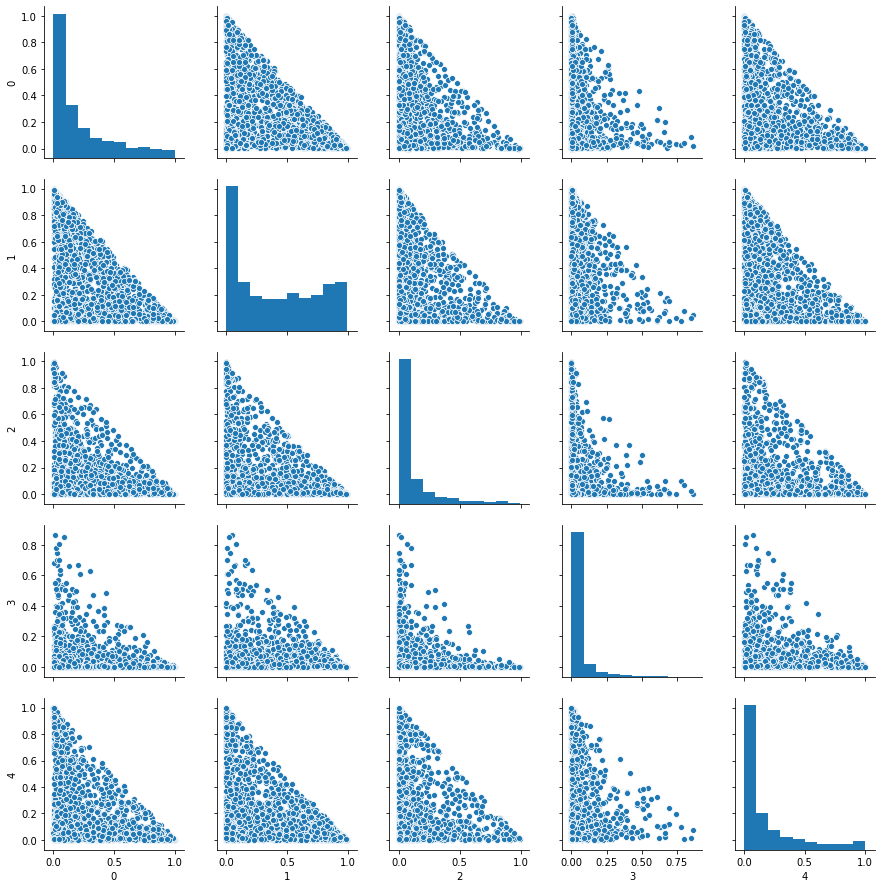

In [18]:
vals=[next(img_dirit) for i in range(8)]
tx=np.concatenate([v[0] for v in vals])
ty=np.concatenate([v[1] for v in vals])
preds=model.predict(tx)
df1=pd.DataFrame(preds)
df1.columns.name='preds'
df1['cat']=ty
df1['cat']=df1['cat'].astype('category')
df1.columns=pd.MultiIndex.from_tuples([('pred',v) for v in range(5)]+[('categories','reel')],names=['el','val'])
df1.loc[:,('categories','predites')]=preds.argmax(axis=1)
df1[('categories','predites')]=df1[('categories','predites')].astype('category',copy=False)
sns.pairplot(df1.loc[:,'pred'])

Les histogrammes rekprésentent la précision des predictions en fonction des photos
La plus difficile à reconnaître semble être le label 1 (Dandelion)
Le plus simple à reconnaître semble être le label 3 (sunflowers)